In [1]:
import pickle

import matplotlib.pyplot as plt
import pandas as pd

from definitions import TISSUES

# Information on Reactomes predicting tissues

In this notebook you will find instructions on how to find, for each tissue, which reactomes were able to predict it (given the F1 score metric).

## Table with results

Firstly, by executing the following cell, you will create a DataFrame `all_f1`, with all the F1 scores from all the SVM runs.

In [2]:
indexes = []
all_data_f1 = []

reactomes = pd.read_table("meta_data/reactomes_names.txt", header=None).iloc[:, 0].values

for react in reactomes:
    dic_community = pickle.load(open("svm_results/r_" + react + ".pkl", "rb"))

    # Going over each tissue
    arr_f1 = []

    for f_name in TISSUES:
        arr_f1.append(dic_community[f_name]['f1'])

    all_data_f1.append(arr_f1)
    indexes.append(react)

all_f1 = pd.DataFrame(all_data_f1, index=indexes, columns=TISSUES)

## Showing information per tissue

We define the function `show_info_for_tissue`:

In [3]:
def show_info_for_tissue(tissue, threshold, save_fig=False):
    print("***** " + tissue + " *****")

    tmp = pd.DataFrame(all_f1.loc[all_f1[tissue] > threshold, tissue].sort_values(ascending=False).round(decimals=4))
    if tmp.shape[0] == 0:
        print("  Not predicted by any reactome given the threshold!")
        return

    print("Predicted by " + str(tmp.shape[0]) + " reactomes")
    print()
    plt.figure()
    tablea = plt.table(cellText=tmp.values, loc='center', rowLabels=tmp.index.values,
                       colLabels=['F1 Score for ' + tissue])
    tablea.properties()['celld'][(0, 0)].set_text_props(fontweight='bold')
    plt.axis('off')
    plt.tight_layout()
    if save_fig:
        plt.savefig(f'figures/react_{tissue}.pdf', bbox_inches = 'tight', pad_inches = 0)
    plt.show()
    plt.close()

Here it is the function's output for the Adipose Subcutaneous, showing only reactomes with a F1 score above 0.8. We have also passed the argument `save_fig` to save a figure of the output table. For this case, it will be saved in `figures/react_Adipose_Subcutaneous.pdf`. If you do not want to save a figure in disk, just do not define that argument, which will default to False.

***** Adipose_Subcutaneous *****
Predicted by 35 reactomes



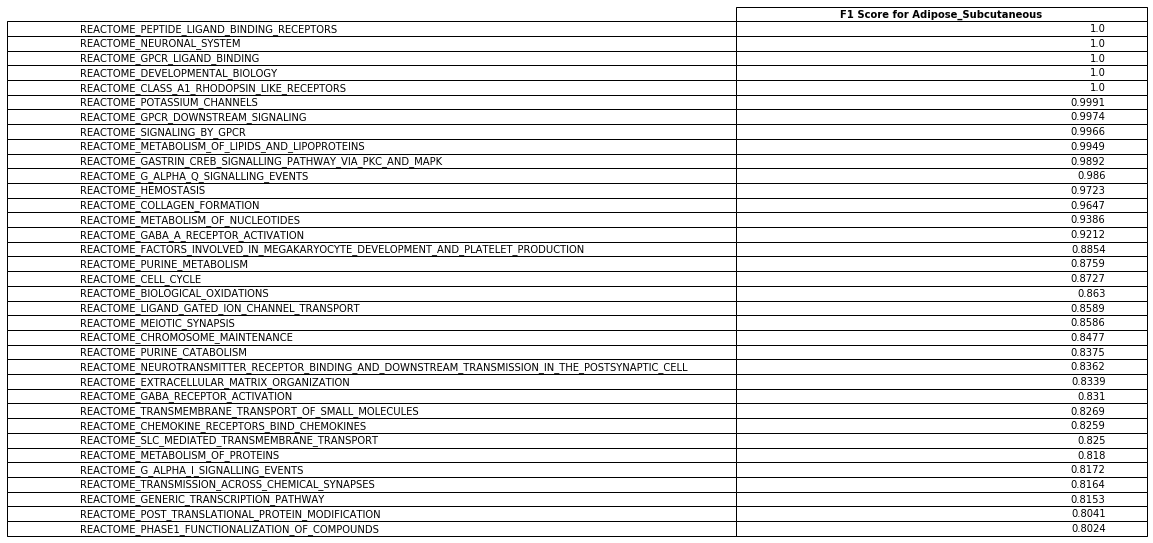

In [4]:
show_info_for_tissue('Adipose_Subcutaneous', threshold=0.8, save_fig=True)